# **INTRODUCTION**




This project was designed to serve as a final assessment for the Data Science certification of coursera, IBM's online course, as well as to serve as an intermediary assessment of the Data Science Infnet course, Data Analytics and Machine Learning. The objective of the project is to answer the question: where’s the best location to open the “FastSnack” cafeteria? It is important to note that the scope of the project limited the search for the ideal location to the surroundings of the Botafogo neighborhood, located in the city of Rio de Janeiro, in Brazil.

Botafogo is a neighborhood located in the prime area of one of the main cities in Latin America, which makes it an extremely attractive place, however it imposes some difficulties. The high HDI of 0.952 in the region suggests a good financial condition for its residents, in addition the neighborhood has a strong commercial area, which generates a large volume of circulation of people, both factors are attractive for the establishment of businesses. However, the reasons that drive the interests of establishing the cafeteria also attract several other competitors.

Two niches of diner customers are very present in Botafogo, workers and students, both constantly in search of fast and practical food to consume between their chores. FastSnack opted for the area precisely to benefit from both niches, however the focus will be directed to serving students, due to the easy location of their concentration points as well as the low demand regarding the food consumed. Once this direction of the business is defined, the focus to be adopted to achieve the project objective is clear, seeking the place with the highest concentration of schools.

However, to better support the choice, the number of competitors in the surroundings will also be considered. This search was limited to a small radius due to the nature of the business being aimed at the convenience of those who are close. Thus, the aim of the project is to find a location in the designated region with a balance between a high number of schools and a small number of competitors. This choice was based on data science tools and techniques, following its methodology in order to find the point that balances the two variables mentioned.

The database supporting the entire analysis was Foursuare, which offers a variety of reliable information. After data collection, pre-processing, cleaning, filtering and formatting were performed in order to make them suitable for use in the model. The predefined scope of using a clustering machine learning, specifically K-means is adequate, since the need for the problem is to identify regions where there were a high number of schools. Finally, the analysis of the number of competitors takes place in the clusters generated through the concentration of schools.



# **DATA IMPORT**

## Libraries import


In [ ]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 81kB 3.7MB/s 
  Created wheel for folium: filename=folium-0.5.0-cp37-none-any.whl size=76240 sha256=d0ca73f2ea91c6d617ef20697af6e2a62d971ae7436648ea15fac6647cbbe4d2
  Stored in directory: /root/.cache/pip/wheels/f8/98/ff/954791afc47740d554f0d9e5885fa09dd60c2265d42578e665
Successfully built folium
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.5.0 which is incompatible.
  Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3
Folium installed
Libraries imported.


## Defining Foursquare credentials


In [ ]:
CLIENT_ID = 'OVOYYG442WJ5CGV3NJQPKWGAWQAT34HJDLJXULJOHBSNIF2K' # your Foursquare ID
CLIENT_SECRET = 'II1GJP0AVCLXFUJBYYZOGFE3K1QS2VCQL1DEVQ5ERV44GW3D' # your Foursquare Secret
ACCESS_TOKEN = 'YWIRCSZ5GWJCFITXYSA5ZBZRCGHXX42B4DMWFUIBJ2O040JC' # your FourSquare Access Token
VERSION = '20180604'


### Let's start by converting the address near the central part of the school neighborhood and we will obtain your latitude and longitude coordinates
In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>foursquare_agent</em>, as shown below.

In [ ]:
address = 'R. Praia de Botafogo, 328, Rio de Janeiro, RJ'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

-22.9410601 -43.1773129


# CHOOSING WHAT TO LOOK FOR

> `https://api.foursquare.com/v2/venues/`**search**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&query=`**QUERY**`&radius=`**RADIUS**`&limit=`**LIMIT**


In [ ]:
search_query = 'Escola'
radius = 3000
LIMIT = 200



## Define the corresponding URL


In [ ]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID,
                                                                                                                                                  CLIENT_SECRET, 
                                                                                                                                                  latitude, 
                                                                                                                                                  longitude,
                                                                                                                                                  ACCESS_TOKEN,
                                                                                                                                                  VERSION, 
                                                                                                                                                  search_query,
                                                                                                                                                  radius, 
                                                                                                                                                  LIMIT)

## Send the GET Request and examine the results


In [ ]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6085d1ad2ce7be68aa4aa8cb'},
 'notifications': [{'item': {'unreadCount': 0}, 'type': 'notificationTray'}],
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/education/communitycollege_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d1a2941735',
      'name': 'Community College',
      'pluralName': 'Community Colleges',
      'primary': True,
      'shortName': 'Community College'}],
    'hasPerk': False,
    'id': '4e3d369b18a83d5b28409631',
    'location': {'address': 'Av. Oswaldo Cruz',
     'cc': 'BR',
     'city': 'Rio de Janeiro',
     'country': 'Brasil',
     'distance': 108,
     'formattedAddress': ['Av. Oswaldo Cruz', 'Rio de Janeiro, RJ'],
     'labeledLatLngs': [{'label': 'display',
       'lat': -22.941073479083617,
       'lng': -43.17625575538565}],
     'lat': -22.941073479083617,
     'lng': -43.17625575538565,
     'state': 'RJ'},
    'name': 'Escola Municipal Alberto Barth

# **PRE-PROCESSING OF DATA**

## Get relevant part of JSON and transform it into a _pandas_ dataframe


In [ ]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.postalCode,location.crossStreet,location.neighborhood
0,4e3d369b18a83d5b28409631,Escola Municipal Alberto Barth,"[{'id': '4bf58dd8d48988d1a2941735', 'name': 'C...",v-1619382701,False,Av. Oswaldo Cruz,-22.941073,-43.176256,"[{'label': 'display', 'lat': -22.9410734790836...",108,BR,Rio de Janeiro,RJ,Brasil,"[Av. Oswaldo Cruz, Rio de Janeiro, RJ]",NaN,NaN,NaN
1,4f16a66de4b0958ec65f5315,Escola Dinamis MP,"[{'id': '52e81612bcbc57f1066b7a46', 'name': 'P...",v-1619382701,False,R. Mq. de Pinedo 26,-22.937333,-43.181770,"[{'label': 'display', 'lat': -22.9373325120214...",617,BR,Rio de Janeiro,RJ,Brasil,"[R. Mq. de Pinedo 26, Rio de Janeiro, RJ, 2223...",22231-100,NaN,NaN
2,4bfa83a2b182c9b6d0647a5a,Maternidade Escola UFRJ,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1619382701,False,"R. das Laranjeiras, 180",-22.932961,-43.184969,"[{'label': 'display', 'lat': -22.9329613504126...",1195,BR,Rio de Janeiro,RJ,Brasil,"[R. das Laranjeiras, 180, Rio de Janeiro, RJ, ...",22240-001,NaN,NaN
3,4bdf3ee50ee3a593777933b0,Escola Alemã Corcovado (Deutsche Schule),"[{'id': '4bf58dd8d48988d1a8941735', 'name': 'G...",v-1619382701,False,"R. S. Clemente, 388",-22.951291,-43.194591,"[{'label': 'display', 'lat': -22.9512908935022...",2105,BR,Rio de Janeiro,RJ,Brasil,"[R. S. Clemente, 388, Rio de Janeiro, RJ, 2226...",22260-000,NaN,NaN
4,4db7fb906a238ed5d8e9bf90,Escola Dinamis BAM I,"[{'id': '52e81612bcbc57f1066b7a46', 'name': 'P...",v-1619382701,False,"R. Bambina, 118",-22.947096,-43.185942,"[{'label': 'display', 'lat': -22.9470955315031...",1110,BR,Rio de Janeiro,RJ,Brasil,"[R. Bambina, 118, Rio de Janeiro, RJ, 22251-050]",22251-050,NaN,NaN


In [ ]:
dataframe.shape

(50, 18)

In [ ]:
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.postalCode,location.crossStreet,location.neighborhood
0,4e3d369b18a83d5b28409631,Escola Municipal Alberto Barth,"[{'id': '4bf58dd8d48988d1a2941735', 'name': 'C...",v-1619382701,False,Av. Oswaldo Cruz,-22.941073,-43.176256,"[{'label': 'display', 'lat': -22.9410734790836...",108,BR,Rio de Janeiro,RJ,Brasil,"[Av. Oswaldo Cruz, Rio de Janeiro, RJ]",NaN,NaN,NaN
1,4f16a66de4b0958ec65f5315,Escola Dinamis MP,"[{'id': '52e81612bcbc57f1066b7a46', 'name': 'P...",v-1619382701,False,R. Mq. de Pinedo 26,-22.937333,-43.181770,"[{'label': 'display', 'lat': -22.9373325120214...",617,BR,Rio de Janeiro,RJ,Brasil,"[R. Mq. de Pinedo 26, Rio de Janeiro, RJ, 2223...",22231-100,NaN,NaN
2,4bfa83a2b182c9b6d0647a5a,Maternidade Escola UFRJ,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1619382701,False,"R. das Laranjeiras, 180",-22.932961,-43.184969,"[{'label': 'display', 'lat': -22.9329613504126...",1195,BR,Rio de Janeiro,RJ,Brasil,"[R. das Laranjeiras, 180, Rio de Janeiro, RJ, ...",22240-001,NaN,NaN
3,4bdf3ee50ee3a593777933b0,Escola Alemã Corcovado (Deutsche Schule),"[{'id': '4bf58dd8d48988d1a8941735', 'name': 'G...",v-1619382701,False,"R. S. Clemente, 388",-22.951291,-43.194591,"[{'label': 'display', 'lat': -22.9512908935022...",2105,BR,Rio de Janeiro,RJ,Brasil,"[R. S. Clemente, 388, Rio de Janeiro, RJ, 2226...",22260-000,NaN,NaN
4,4db7fb906a238ed5d8e9bf90,Escola Dinamis BAM I,"[{'id': '52e81612bcbc57f1066b7a46', 'name': 'P...",v-1619382701,False,"R. Bambina, 118",-22.947096,-43.185942,"[{'label': 'display', 'lat': -22.9470955315031...",1110,BR,Rio de Janeiro,RJ,Brasil,"[R. Bambina, 118, Rio de Janeiro, RJ, 22251-050]",22251-050,NaN,NaN


# **DATA CLEANING AND FILTERING**


In [ ]:
# keep only columns
df_school = dataframe.drop(['referralId', 'hasPerk', 'location.labeledLatLngs', 'location.distance', 'location.cc', 'location.city', 'location.state', 'location.country', 'location.formattedAddress', 'location.postalCode', 'location.crossStreet', 'location.neighborhood'], 1)
df_school.head()

,id,name,categories,location.address,location.lat,location.lng
0,4e3d369b18a83d5b28409631,Escola Municipal Alberto Barth,"[{'id': '4bf58dd8d48988d1a2941735', 'name': 'C...",Av. Oswaldo Cruz,-22.941073,-43.176256
1,4f16a66de4b0958ec65f5315,Escola Dinamis MP,"[{'id': '52e81612bcbc57f1066b7a46', 'name': 'P...",R. Mq. de Pinedo 26,-22.937333,-43.181770
2,4bfa83a2b182c9b6d0647a5a,Maternidade Escola UFRJ,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...","R. das Laranjeiras, 180",-22.932961,-43.184969
3,4bdf3ee50ee3a593777933b0,Escola Alemã Corcovado (Deutsche Schule),"[{'id': '4bf58dd8d48988d1a8941735', 'name': 'G...","R. S. Clemente, 388",-22.951291,-43.194591
4,4db7fb906a238ed5d8e9bf90,Escola Dinamis BAM I,"[{'id': '52e81612bcbc57f1066b7a46', 'name': 'P...","R. Bambina, 118",-22.947096,-43.185942


In [ ]:
# clean column names by keeping only last term
df_school.columns = [column.split('.')[-1] for column in df_school.columns]
df_school = df_school.rename(columns={'lat':'Latitude', 'lng':'Longitude'})
df_school.head()

,id,name,categories,address,Latitude,Longitude
0,4e3d369b18a83d5b28409631,Escola Municipal Alberto Barth,"[{'id': '4bf58dd8d48988d1a2941735', 'name': 'C...",Av. Oswaldo Cruz,-22.941073,-43.176256
1,4f16a66de4b0958ec65f5315,Escola Dinamis MP,"[{'id': '52e81612bcbc57f1066b7a46', 'name': 'P...",R. Mq. de Pinedo 26,-22.937333,-43.181770
2,4bfa83a2b182c9b6d0647a5a,Maternidade Escola UFRJ,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...","R. das Laranjeiras, 180",-22.932961,-43.184969
3,4bdf3ee50ee3a593777933b0,Escola Alemã Corcovado (Deutsche Schule),"[{'id': '4bf58dd8d48988d1a8941735', 'name': 'G...","R. S. Clemente, 388",-22.951291,-43.194591
4,4db7fb906a238ed5d8e9bf90,Escola Dinamis BAM I,"[{'id': '52e81612bcbc57f1066b7a46', 'name': 'P...","R. Bambina, 118",-22.947096,-43.185942


# **VISUALIZATING AND FORMATTING THE DATA**

In [ ]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_school['categories'] = df_school.apply(get_category_type, axis=1)
df_school.head()

,id,name,categories,address,Latitude,Longitude
0,4e3d369b18a83d5b28409631,Escola Municipal Alberto Barth,Community College,Av. Oswaldo Cruz,-22.941073,-43.176256
1,4f16a66de4b0958ec65f5315,Escola Dinamis MP,Private School,R. Mq. de Pinedo 26,-22.937333,-43.181770
2,4bfa83a2b182c9b6d0647a5a,Maternidade Escola UFRJ,Hospital,"R. das Laranjeiras, 180",-22.932961,-43.184969
3,4bdf3ee50ee3a593777933b0,Escola Alemã Corcovado (Deutsche Schule),General College & University,"R. S. Clemente, 388",-22.951291,-43.194591
4,4db7fb906a238ed5d8e9bf90,Escola Dinamis BAM I,Private School,"R. Bambina, 118",-22.947096,-43.185942


In [ ]:
df_school.name

0                        Escola Municipal Alberto Barth
1                                     Escola Dinamis MP
2                               Maternidade Escola UFRJ
3              Escola Alemã Corcovado (Deutsche Schule)
4                                  Escola Dinamis BAM I
5                        Escola Superior de Redes – RNP
6                                     Escola Dinamis BL
7                         Escola de Futebol do Botafogo
8                                      Escola de Teatro
9                      Escola de Serviço Social da UFRJ
10                                   Escola de Educação
11                 Auditório da Escola de Seviço Social
12                            Escola Portátil de Música
13        Escola de Dança e Centro Cultural Jaime Arôxa
14                                 auto escola 2 irmaos
15                                Escola de Comunicação
16                   Escola de Enfermagem Alfredo Pinto
17                               Escola de Turis

## Let's visualize the schools that are nearby

In [ ]:
school_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred: Praia de Botafogo 328

# add a red circle marker to represent Praia de Botafogo 328
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Praia de Botagofo',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.8
).add_to(school_map)

# add the others school as blue circle markers
for lat, lon, label_school in zip(df_school.Latitude, df_school.Longitude, df_school.name):
    label=folium.Popup(str(label_school), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.8
    ).add_to(school_map)

school_map

In [ ]:
df_school

,id,name,categories,address,Latitude,Longitude
0,4e3d369b18a83d5b28409631,Escola Municipal Alberto Barth,Community College,Av. Oswaldo Cruz,-22.941073,-43.176256
1,4f16a66de4b0958ec65f5315,Escola Dinamis MP,Private School,R. Mq. de Pinedo 26,-22.937333,-43.181770
2,4bfa83a2b182c9b6d0647a5a,Maternidade Escola UFRJ,Hospital,"R. das Laranjeiras, 180",-22.932961,-43.184969
3,4bdf3ee50ee3a593777933b0,Escola Alemã Corcovado (Deutsche Schule),General College & University,"R. S. Clemente, 388",-22.951291,-43.194591
4,4db7fb906a238ed5d8e9bf90,Escola Dinamis BAM I,Private School,"R. Bambina, 118",-22.947096,-43.185942
5,4e84a93b6d860e3517ce73ff,Escola Superior de Redes – RNP,College Lab,"Rua Lauro Müller, 455 3º andar",-22.954085,-43.174260
6,4dd2da391f6e1eb5a59a06d5,Escola Dinamis BL,Private School,R. Bar. de Lucena 37,-22.948565,-43.187764
7,4c934d68f600236a8420c432,Escola de Futebol do Botafogo,Soccer Field,Botafogo de Futebol e Regatas,-22.955336,-43.176942
8,599c571f59fe5c573873d130,Escola de Teatro,College Theater,CLA,-22.955025,-43.170940
9,4d7e4557ebc15481e2f5dea6,Escola de Serviço Social da UFRJ,College Academic Building,UFRJ Campus Praia Vermelha,-22.953050,-43.173889


## Dropping out of irrelevant school

In [ ]:
df_school = df_school.drop(df_school[df_school['id'] == '4ca89de7b7106dcb241674a5'].index)

# **K-MEANS IMPLEMENTATION**

## Choosing the number of clusters with Elbow

In [ ]:
coordinates_Kmeans = df_school.drop(['id', 'name', 'categories', 'address'], 1)
coordinates_Kmeans.head()

,Latitude,Longitude
0,-22.941073,-43.176256
1,-22.937333,-43.181770
2,-22.932961,-43.184969
3,-22.951291,-43.194591
4,-22.947096,-43.185942


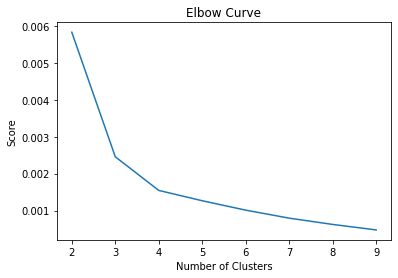

In [ ]:

K_clusters = range(2,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_school[['Latitude']]
X_axis = df_school[['Longitude']]

score = [kmeans[i].fit(coordinates_Kmeans).inertia_ for i in range(len(kmeans))]
#score = [kmeans[i].fit(coordinates_Kmeans).score(coordinates_Kmeans) for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


## Choosing number of clusters with Silhouette

In [ ]:
from sklearn.metrics import silhouette_score
#silh_df = coordinates_Kmeans.iloc[1:50,:]
for i in range(2,10):
  kmeans_ = KMeans(n_clusters=i).fit(coordinates_Kmeans)
  labels_ = kmeans_.labels_
  coef = silhouette_score(coordinates_Kmeans, labels_)
  
  print("N_cluster: {}, score: {}".format(i,coef))

N_cluster: 2, score: 0.43646185273165367
N_cluster: 3, score: 0.5756011372775707
N_cluster: 4, score: 0.5505083980979936
N_cluster: 5, score: 0.4923083229318444
N_cluster: 6, score: 0.49287730228247595
N_cluster: 7, score: 0.5087600534629187
N_cluster: 8, score: 0.5490108091943965
N_cluster: 9, score: 0.5378116068622071


## K-Means

In [ ]:
#Creating another column with the cluster labels
k=3
kmeans = KMeans(n_clusters = k, init = 'random', n_init = 100, max_iter = 300, random_state=123).fit(coordinates_Kmeans)

centers_clusters = kmeans.cluster_centers_

df_school.insert(0, 'Cluster Labels', kmeans.labels_)
df_school.head()

,Cluster Labels,id,name,categories,address,Latitude,Longitude
0,1,4e3d369b18a83d5b28409631,Escola Municipal Alberto Barth,Community College,Av. Oswaldo Cruz,-22.941073,-43.176256
1,1,4f16a66de4b0958ec65f5315,Escola Dinamis MP,Private School,R. Mq. de Pinedo 26,-22.937333,-43.181770
2,1,4bfa83a2b182c9b6d0647a5a,Maternidade Escola UFRJ,Hospital,"R. das Laranjeiras, 180",-22.932961,-43.184969
3,1,4bdf3ee50ee3a593777933b0,Escola Alemã Corcovado (Deutsche Schule),General College & University,"R. S. Clemente, 388",-22.951291,-43.194591
4,1,4db7fb906a238ed5d8e9bf90,Escola Dinamis BAM I,Private School,"R. Bambina, 118",-22.947096,-43.185942


In [ ]:
df_school.groupby(['Cluster Labels'])['id'].count()


Cluster Labels
0     7
1    25
2    17
Name: id, dtype: int64

## Clusters visualization

In [ ]:
colors={0:'red',1:'blue',2:'brown'}
map_school_cluster = folium.Map(location=[latitude, longitude],zoom_start=10)


for lat, lon, name, clusters in zip(df_school['Latitude'],df_school['Longitude'], df_school['name'], df_school['Cluster Labels']):
    label=folium.Popup(str(name) + ', Cluster: ' + str(clusters), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        fill=True,
        color=colors[clusters],
        fill_color= colors[clusters],
        fill_opacity=0.7
        ).add_to(map_school_cluster)

map_school_cluster

# **ADDING A NEW VARIABLE, RESTAURANT NUMBERS**

## Clusters centroids

In [ ]:
#Creating a dictionary with the coordinates of each centroid generated by K-means
number_clusters = [0, 1, 2]
lat_centers=[]
lng_centers=[]

for i in range(len(centers_clusters)):
   lat_centers.append(centers_clusters[i][0])
   lng_centers.append(centers_clusters[i][1])


dict={'labels': number_clusters, 'latitude_food':lat_centers, 'longitude_food':lng_centers}
df_centers= pd.DataFrame(dict)
 
df_centers

,labels,latitude_food,longitude_food
0,0,-22.912850,-43.178454
1,1,-22.939979,-43.183099
2,2,-22.954258,-43.171412


In [ ]:
kmeans.cluster_centers_

array([[-22.91285027, -43.17845389],
       [-22.93997863, -43.18309894],
       [-22.95425845, -43.17141154]])

## Selecting the search radius

In [ ]:
search_query = 'Restaurante'
radius = 400
LIMIT = 100

## Number of restaurants in each cluster

In [ ]:
list_food =[]
numbers_cluster = [0, 1, 2]

for i in numbers_cluster:
  latitude_food = df_centers['latitude_food'][i]
  longitude_food = df_centers['longitude_food'][i]
  url_food = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_food, longitude_food,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
  results_food = requests.get(url_food).json()
  list_food.append(len(results_food['response']['venues']))

In [ ]:
list_food

[50, 15, 6]

In [ ]:
df_school.groupby(['Cluster Labels'])['id'].count()


Cluster Labels
0     7
1    25
2    17
Name: id, dtype: int64

# **CONCLUSION**

Considering only the number of schools, it is clear which region should be chosen. The blue cluster has approximately half of the total number of schools analyzed, so in this first analysis the FastSnack's ideal location would be in the center of the blue cluster, this is the region where it would be able to serve its 25 schools in the best way. In addition, a factor that had not been expected is that the blue cluster is in the center of Botafogo, although the proximity of the center of the neighborhood was not a variable that was intended to be achieved previously, this fact ends up being a satisfactory coincidence. In contrast, the red cluster has a low concentration of schools, 7 in total. The brown cluster has approximately 35% of schools, a lower number compared to the aul cluster, approximately one and a half times smaller. However, it still has a reasonable number of schools in its surroundings.

To find the final answer, another data is important, the number of competing restaurants in each cluster. Again, the red cluster was in the worst position with more competitors nearby. However, in this analysis the best placed was the Brown cluster with less competitors than the blue cluster. Finally, we can see the proportion between the number of schools and the number of competitors.

The brown cluster is the ideal location to open FastSnack, as it is the point that best balances the relationship between consumers and competitors. It has a proportion of 2.87 schools / restaurants, the best among the three clusters.